<a href="https://colab.research.google.com/github/pshvaa/DrugClassification/blob/main/DrugClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import (accuracy_score,
                            precision_score,
                            recall_score,
                            f1_score,
                            classification_report,
                            confusion_matrix)

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sabirapashayeva","key":"5f608fadf25125954bc327bf6fe24ec6"}'}

In [4]:
! chmod 600 /content/kaggle.json

In [5]:
!kaggle datasets download -d prathamtripathi/drug-classification

Dataset URL: https://www.kaggle.com/datasets/prathamtripathi/drug-classification
License(s): CC0-1.0
  0% 0.00/1.68k [00:00<?, ?B/s]
100% 1.68k/1.68k [00:00<00:00, 3.24MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('drug-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
df = pd.read_csv(r'/content/drug200.csv')
df.head(20)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [8]:
df.shape

(200, 6)

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [14]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

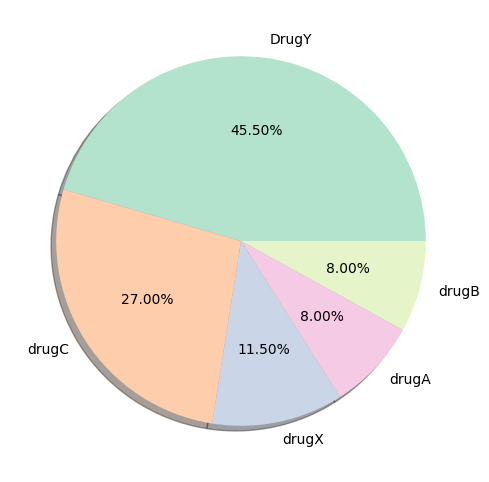

In [15]:
plt.figure(figsize = (10, 6))
# colors = ['#8ecae6', '#219ebc', '#023047', '#ffb703', '#fb8500']
plt.pie(df["Drug"].value_counts(), labels = df["Drug"].unique(), colors=plt.cm.Pastel2.colors, autopct = "%.2f%%", shadow = True)
plt.show()

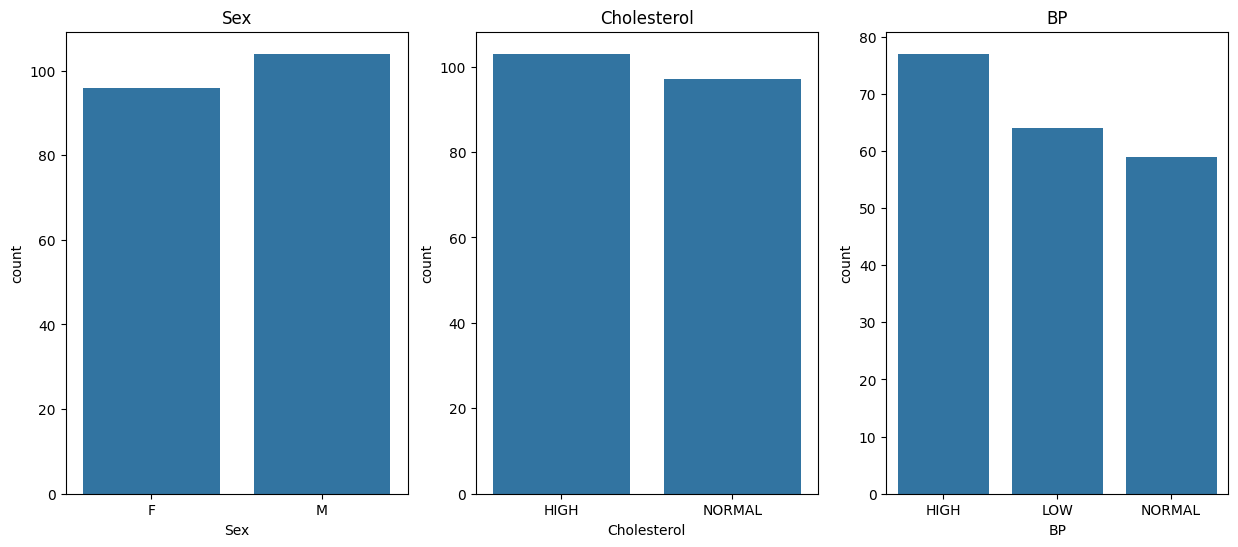

In [16]:
fig, axes = plt.subplots(1, 3, figsize = (15, 6))

sns.countplot(ax = axes[0], x = df["Sex"])
axes[0].set_title("Sex")

sns.countplot(ax = axes[1], x = df["Cholesterol"])
axes[1].set_title("Cholesterol")

sns.countplot(ax = axes[2], x = df["BP"])
axes[2].set_title("BP")


plt.show()

In [17]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

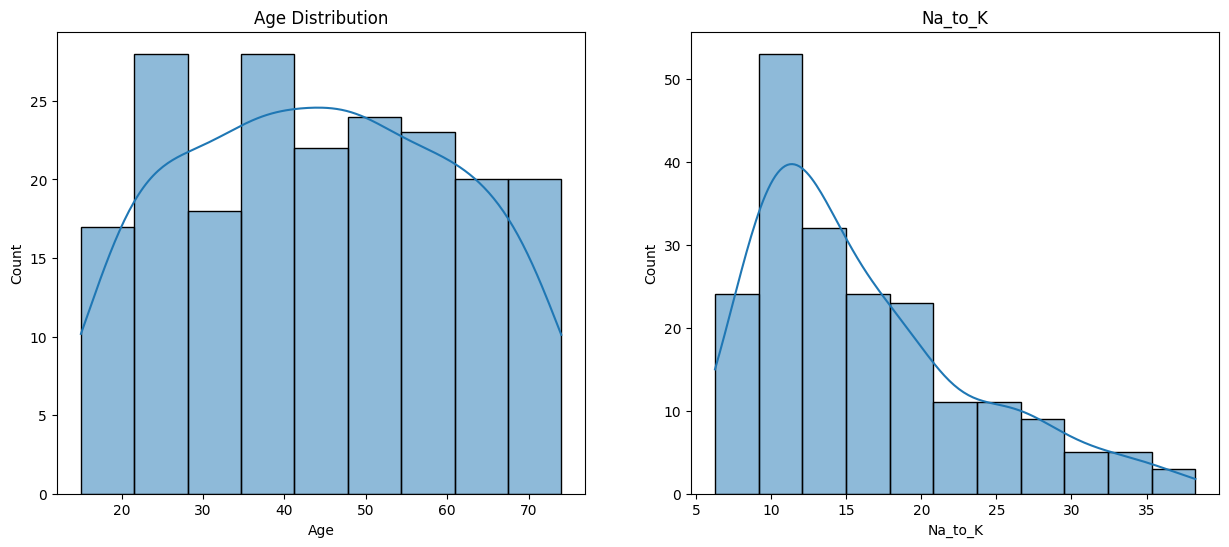

In [18]:
fig, axes = plt.subplots(1, 2, figsize = (15, 6))

sns.histplot(ax = axes[0], x = df["Age"], kde = True)
axes[0].set_title("Age Distribution")

sns.histplot(ax = axes[1], x = df["Na_to_K"], kde = True)
axes[1].set_title("Na_to_K")


plt.show()

In [19]:
X = df.drop("Drug", axis = 1).copy()
y = df["Drug"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
X_train.shape, X_test.shape

((160, 5), (40, 5))

<Figure size 1500x600 with 0 Axes>

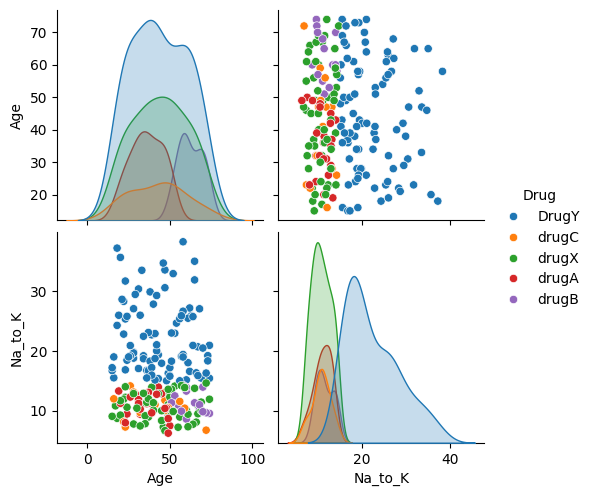

In [20]:
# Using Seaborn's pairplot
plt.figure(figsize = (15, 6))
sns.pairplot(df, hue = "Drug");
plt.show()

In [21]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [22]:
le.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [23]:
num_features = X_train.select_dtypes(include = [np.number]).columns
cat_features = X_train.select_dtypes(exclude = [np.number]).columns

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = 'median')),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown = 'ignore', sparse = False))
])

transformer = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

In [24]:
X_train_trans = transformer.fit_transform(X_train)
col_names = transformer.get_feature_names_out()
X_test_trans = transformer.transform(X_test)

X_train_trans_df = pd.DataFrame(X_train_trans, columns = col_names)
X_test_trans_df = pd.DataFrame(X_test_trans, columns = col_names)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
X_train_trans_df.head(10)

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,1.102455,1.573317,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.546401,-0.260863,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.287807,-0.312023,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.422833,0.985817,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.565708,-1.144642,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5,0.546401,0.980195,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,0.978887,-0.828967,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7,0.978887,-0.377520,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.175698,-0.825734,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,1.164239,1.395380,0.0,1.0,0.0,0.0,1.0,1.0,0.0


# Checking different model performance

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {"DecisionTreeClassifier" : DecisionTreeClassifier(min_samples_leaf = 3, random_state = 42),
          "KNeighborsClassifier" : KNeighborsClassifier(),
          "RandomForest" : RandomForestClassifier(random_state = 42),
          "LogisticRegression" : OneVsOneClassifier(LogisticRegression(random_state = 42)),
          "SVC" : OneVsOneClassifier(SVC(random_state = 42))
          }


def classification_model(models, X_train, X_test, y_train, y_test):
  accuracy_scores = []
  precision_scores = []
  recall_scores = []
  f1_scores = []
  cross_vals = []

  for key, value in models.items():
    kf = KFold(n_splits = 6, random_state = 42, shuffle = True)
    cv_results = cross_val_score(value, X_train, y_train, cv = kf)
    cross_vals.append(cv_results)
    mod = value.fit(X_train, y_train)
    preds_test = mod.predict(X_test)
    preds_train = mod.predict(X_train)

    print("Model: ", key)
    print("Accuracy score in the test set: ", accuracy_score(y_test, preds_test))
    print("Accuracy score in the train set: ", accuracy_score(y_train, preds_train))
    print("Precision score in the test set: ", precision_score(y_test, preds_test, average = 'macro'))
    print("Precision score in the train set: ", precision_score(y_train, preds_train, average = 'macro'))
    print("Recall score in the test set: ", recall_score(y_test, preds_test, average = 'macro'))
    print("Recall score in the train set: ", recall_score(y_train, preds_train, average = 'macro'))
    print('=' * 50)

  print('*' * 50)
  plt.figure(figsize = (10, 8))
  plt.title('Boxplot of different models')
  plt.boxplot(cross_vals, labels = models.keys())
  plt.show()

Model:  DecisionTreeClassifier
Accuracy score in the test set:  0.975
Accuracy score in the train set:  1.0
Precision score in the test set:  0.9894736842105264
Precision score in the train set:  1.0
Recall score in the test set:  0.9818181818181818
Recall score in the train set:  1.0
Model:  KNeighborsClassifier
Accuracy score in the test set:  0.675
Accuracy score in the train set:  0.8875
Precision score in the test set:  0.7294117647058823
Precision score in the train set:  0.8840273577259878
Recall score in the test set:  0.6240404040404041
Recall score in the train set:  0.8499764473960078
Model:  RandomForest
Accuracy score in the test set:  0.975
Accuracy score in the train set:  1.0
Precision score in the test set:  0.9894736842105264
Precision score in the train set:  1.0
Recall score in the test set:  0.9818181818181818
Recall score in the train set:  1.0
Model:  LogisticRegression
Accuracy score in the test set:  0.925
Accuracy score in the train set:  0.975
Precision score

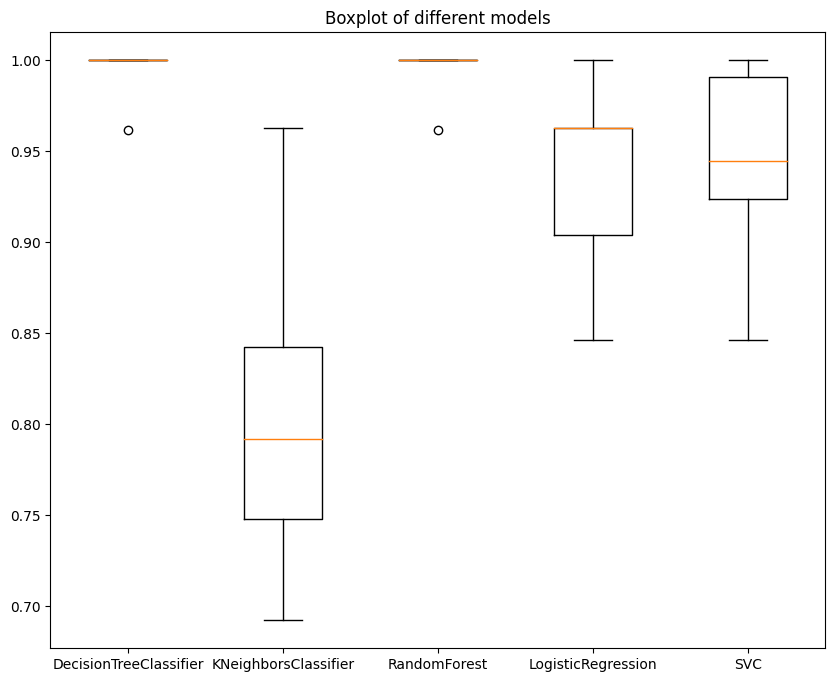

In [27]:
classification_model(models, X_train_trans_df, X_test_trans_df, y_train_encoded, y_test_encoded)

In [28]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train_trans_df, y_train_encoded)
dec_tree.score(X_test_trans_df, y_test_encoded)

0.975

In [29]:
preds_test = dec_tree.predict(X_test_trans_df)
preds_train = dec_tree.predict(X_train_trans_df)

In [30]:
confusion_matrix(y_test_encoded, preds_test)

array([[18,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 1,  0,  0,  0, 10]])

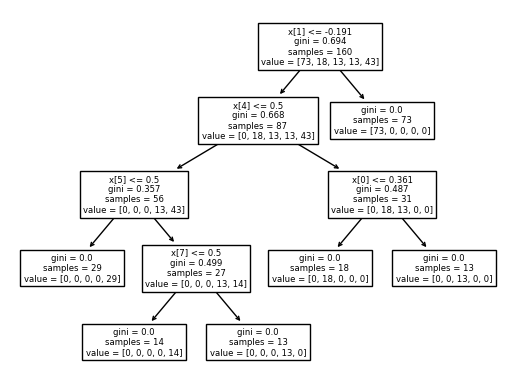

In [31]:
tree.plot_tree(dec_tree);

In [32]:
# plt.scatter(X_test_trans_df, y_test_encoded, color = "blue")

In [33]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators = [
        ('rand_forest', RandomForestClassifier()),
        ('svc', SVC(random_state = 42)),
        ('log_reg', LogisticRegression(random_state = 42))
])

voting_clf.fit(X_train_trans_df, y_train_encoded)

VotingClassifier(estimators=[('rand_forest', RandomForestClassifier()),
                             ('svc', SVC(random_state=42)),
                             ('log_reg', LogisticRegression(random_state=42))])

In [34]:
voting_clf.named_estimators_ # underscore importance

{'rand_forest': RandomForestClassifier(),
 'svc': SVC(random_state=42),
 'log_reg': LogisticRegression(random_state=42)}

In [35]:
voting_clf.estimators_

[RandomForestClassifier(),
 SVC(random_state=42),
 LogisticRegression(random_state=42)]

In [36]:
for name, clf in voting_clf.named_estimators_.items():
  print(name, "=", clf.score(X_test_trans_df, y_test_encoded))

rand_forest = 0.975
svc = 0.95
log_reg = 0.95


In [37]:
voting_clf.score(X_test_trans_df, y_test_encoded)

0.975

In [38]:
voting_clf.score(X_train_trans_df, y_train_encoded)

0.975

In [39]:
voting_clf.voting = 'soft'
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train_trans_df, y_train_encoded)
voting_clf.score(X_test_trans_df, y_test_encoded)

1.0

In [44]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight(class_weight = 'balanced',
                                                classes = np.unique(y_train_encoded),
                                                y = y_train_encoded)
class_weight

array([0.43835616, 1.77777778, 2.46153846, 2.46153846, 0.74418605])

In [45]:
from sklearn.model_selection import GridSearchCV
params = {
    'log_reg__solver':["newton-cg", "saga", "lbfgs"],
     "log_reg__C": np.linspace(0.001, 1.0, 10),
    "rand_forest__class_weight" : ["balanced", class_weight]
}

tuning = GridSearchCV(voting_clf, params)
tuning.fit(X_train_trans_df, y_train_encoded)
# tuning.score(X_test_trans_df, y_test_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py", line 349, in fit
    return super().fit(X, transformed_y, sample_weight)
  File "/usr/local/lib/p

GridSearchCV(estimator=VotingClassifier(estimators=[('rand_forest',
                                                     RandomForestClassifier()),
                                                    ('svc',
                                                     SVC(probability=True,
                                                         random_state=42)),
                                                    ('log_reg',
                                                     LogisticRegression(random_state=42))],
                                        voting='soft'),
             param_grid={'log_reg__C': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ]),
                         'log_reg__solver': ['newton-cg', 'saga', 'lbfgs'],
                         'rand_forest__class_weight': ['balanced',
                                                       array([0.43835616, 1.77777778, 2.46153846, 2.46153846, 0.74418605])]})

In [46]:
tuning.best_estimator_

VotingClassifier(estimators=[('rand_forest',
                              RandomForestClassifier(class_weight='balanced')),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('log_reg',
                              LogisticRegression(C=0.001, random_state=42,
                                                 solver='newton-cg'))],
                 voting='soft')

In [47]:
tuning.best_params_

{'log_reg__C': 0.001,
 'log_reg__solver': 'newton-cg',
 'rand_forest__class_weight': 'balanced'}

In [41]:
tuning.score(X_test_trans_df, y_test_encoded)

1.0